# Банки - Анализ оттока клиентов

<b> Описание </b>

В банке «Метанпромбанк» повысился отток клиентов. Предыдущие рекомендации, основанные на исследовании оттока и выделении сегментов клиентов, перестали работать в связи с изменением клиентской базы. 

<b> Заказчик: </b> отдел маркетинга “Метанпромбанка”.

<b> Цель работы: </b> выдать рекомендации по снижению оттока клиентов в банке.

<b>Задачи:</b>
1. Предобработки данных: 
    - загрузка данных;
    - переименование столбцов;
    - исследование и обработка пропусков;
    - исследование и обработка явных и неявных дубликаты;
    - исследование и приведение в соответствие типов данных.
2. Исследование данных:
    - проверка корректности значений;
    - удаление выбросов;
    - определение значимых признаков отточности по всем характеристикам;
    - составление портрета клиента.
3. Исследование корреляции:
    - построение матрицы корреляций.
4. Проверка гипотез:
    - о равенстве средних скорингов текущих и бывших клиентов;
    - о равенстве средних заработных плат текущих и бывших клиентов;
    - о равенстве среднего возраста текущих и бывших клиентов;
    - о равенстве среднего количества используемых банковских продуктов текущих и бывших клиентов;
    - о равенстве долей держателей кредитных карт текущих и бывших клиентов.
5. Подведение промежуточных итогов (вывод признаков для сегментации) 
6. Сегментация клиентов по признакам, наиболее влияющим на отток по итогам исследования данных, расчета корреляций и проверки гипотез.
7. Вывод и выдача рекомендаций

<b>Описание данных:</b>
- USERID — идентификатор пользователя,
- score — баллы кредитного скоринга,
- city — город,
- gender — пол,
- age — возраст,
- equity — количество баллов собственности
- balance — баланс на счёте,
- products — количество продуктов, которыми пользуется клиент,
- credit_card — есть ли кредитная карта,
- last_activity — активный клиент,
- EST_SALARY — заработная плата клиента,
- churn — ушёл или нет.

## Загрузка данных

In [1]:
#pip install phik==0.12.3

In [2]:
# импорт библиотек
import pandas as pd

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import statistics
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest

import phik

from itertools import combinations

import warnings
warnings.filterwarnings('ignore')

In [3]:
#загрузка данных
try:
    df = pd.read_csv(r'C:\Users\Евгения\python\Projects\Banks\bank_scrooge.csv')
except:
    print('Ошибка загрузки данных')
df.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [4]:
# общая информация по данным
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [5]:
# описательная статистика для числовых полей
df.describe()

,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00000,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,171814.71260,848.699400,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,33708.23812,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


<b>Вывод:</b>

В полученных данных 10000 строк. Структура данных:
- USERID — идентификатор пользователя,
- score — баллы кредитного скоринга,
- city — город,
- gender — пол,
- age — возраст,
- equity — количество баллов собственности
- balance — баланс на счёте,
- products — количество продуктов, которыми пользуется клиент,
- credit_card — есть ли кредитная карта,
- last_activity — активный клиент,
- EST_SALARY — заработная плата клиента,
- churn — ушёл или нет.

В столбцах возраста и баланса есть пропуски. Необходима корректировка наименований столбцов и преобразование типов данных. Кроме необходимо проверить наличие дубликатов. Для это проведем предобработку данных.

## Предобработка данных

### Переименование столбцов

In [6]:
#переименование столбцов
df = df.rename(columns = {'USERID':'user_id', 'EST_SALARY': 'est_salary'})
df.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


### Обработка пропусков

#### Пропуски в столбце age

In [7]:
#пропуски в столбце age
df[df['age'].isna()]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1247,228075,932.0,Ярославль,М,NaN,5,7601719.20,2,1,1,408121.16,0
2165,187635,692.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0
2444,221156,913.0,Ярославль,М,NaN,0,NaN,1,1,1,135693.24,0
3091,138660,836.0,Ростов,Ж,NaN,5,294315.53,2,0,1,63310.22,1
4912,210674,834.0,Рыбинск,М,NaN,1,238330.52,2,0,1,93775.06,0
5470,218868,827.0,Рыбинск,Ж,NaN,4,448959.07,2,1,1,67835.95,0
5495,151662,884.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,137500.77,0
7236,210135,908.0,Рыбинск,Ж,NaN,4,1120340.31,3,1,1,85002.15,0
7248,219343,920.0,Рыбинск,Ж,NaN,0,NaN,1,1,0,159248.67,0
7345,184913,829.0,Ярославль,Ж,NaN,3,188648.77,2,0,1,75206.90,0


In [8]:
print(f"Количество пропусков: {len(df[df['age'].isna()])}, что составляет {len(df[df['age'].isna()])/len(df)*100:.2f}% от общего числа")

Количество пропусков: 26, что составляет 0.26% от общего числа


Попробуем найти закономерности в пропусках.

In [9]:
# колиество пропусков с группировкой по населенным пунктам
df[df['age'].isna()].groupby('city')['user_id'].count()

city
Ростов        1
Рыбинск      12
Ярославль    13
Name: user_id, dtype: int64

In [10]:
# количество пропусков с группировкой по количеству банковских продуктов и наличию кредитной карты
df[df['age'].isna()].groupby(['products','credit_card'], as_index = False)['user_id'].count()

,products,credit_card,user_id
0,1,0,2
1,1,1,16
2,2,0,4
3,2,1,3
4,3,1,1


Всего 26 пропусков в столбце возраста. Слишком мало данных для утверждения, что есть закономерности, связанные с пропусками в столбце возраста. 

Однако можно заметить:
- большинство клиентов без возраста из отделений Ярославля и Рыбинска, и лишь один из Ростова. 
- 16 пользователей без возраста пользуется одним продуктом и имеет кредитную карту, т.е. единственный продукт = кредитная карта.
Возможно был какой-то технический сбой при оформлении кредитной карты или анкета для оформления кредитной карты не требует обязательного заполнения этого поля. 

Нельзя также исключить возможность человеческого фактора. 

Данные пропуски имеют категорию случайных MCAR. 

Пропусков в этом столбце 0.26%. Логически данные не восстановить. Удалим эти пропуски.

In [11]:
# удаление пропусков
df = df[~df['age'].isna()]

#### Пропуски в столбце balance

In [12]:
# пропуски в столбце balance
df[df['balance'].isna()].head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0
10,148929,927.0,Ростов,М,52.0,0,NaN,1,1,1,196820.07,0
11,172184,921.0,Ростов,М,41.0,0,NaN,1,1,1,217469.48,0
19,127034,922.0,Рыбинск,Ж,53.0,0,NaN,1,0,0,147094.82,0


In [13]:
print('Количество пропусков:', len(df[df['balance'].isna()]), ', что составляет', round(len(df[df['balance'].isna()])/len(df)*100,2), '% от общего числа')

Количество пропусков: 2279 , что составляет 22.85 % от общего числа


Попробуем найти закономерности в пропусках.

In [14]:
# разделение данных на группы с пропусками и без них
df_balance_na = df[df['balance'].isna()]
df_balance = df[~df['balance'].isna()]

In [15]:
# столбцы для группировки
columns = (['city', 'gender', 'equity', 'products', 'credit_card', 'last_activity', 'churn'])

In [16]:
# сравнение распределений по столбцам таблиц с пропусками и без
for col in columns:
    temp = df_balance_na.groupby(col, as_index = False)['user_id'].nunique().rename(columns={'user_id':'balance_na'})
    temp['ratio_na'] = round(temp['balance_na']/temp['balance_na'].sum()*100,2)
    temp = temp.merge(df_balance.groupby(col, as_index = False)['user_id'].nunique().rename(columns={'user_id':'balance'}), on = col, how = 'outer')
    temp['ratio'] = round(temp['balance']/temp['balance'].sum()*100,2)
    print("Сравнение таблиц с пропусками и без по столбцу", col)
    display(temp)

Сравнение таблиц с пропусками и без по столбцу city


,city,balance_na,ratio_na,balance,ratio
0,Ростов,235,10.31,1181,15.35
1,Рыбинск,586,25.71,2097,27.25
2,Ярославль,1458,63.98,4417,57.40


Сравнение таблиц с пропусками и без по столбцу gender


,gender,balance_na,ratio_na,balance,ratio
0,Ж,1007,44.19,3972,51.68
1,М,1272,55.81,3714,48.32


Сравнение таблиц с пропусками и без по столбцу equity


,equity,balance_na,ratio_na,balance,ratio
0,0,2164.0,94.95,412,5.36
1,1,114.0,5.00,659,8.57
2,3,1.0,0.04,1540,20.03
3,2,NaN,NaN,1050,13.66
4,4,NaN,NaN,1844,23.98
5,5,NaN,NaN,1913,24.88
6,6,NaN,NaN,161,2.09
7,7,NaN,NaN,80,1.04
8,8,NaN,NaN,17,0.22
9,9,NaN,NaN,13,0.17


Сравнение таблиц с пропусками и без по столбцу products


,products,balance_na,ratio_na,balance,ratio
0,0,1.0,0.04,NaN,NaN
1,1,1934.0,84.86,1389.0,18.07
2,2,315.0,13.82,4795.0,62.39
3,3,29.0,1.27,1009.0,13.13
4,4,NaN,NaN,474.0,6.17
5,5,NaN,NaN,19.0,0.25


Сравнение таблиц с пропусками и без по столбцу credit_card


,credit_card,balance_na,ratio_na,balance,ratio
0,0,421,18.47,2765,36.01
1,1,1858,81.53,4913,63.99


Сравнение таблиц с пропусками и без по столбцу last_activity


,last_activity,balance_na,ratio_na,balance,ratio
0,0,1028,45.11,3727,48.51
1,1,1251,54.89,3956,51.49


Сравнение таблиц с пропусками и без по столбцу churn


,churn,balance_na,ratio_na,balance,ratio
0,0,2266,99.43,5889,76.53
1,1,13,0.57,1806,23.47


In [17]:
def compair_with_cut (col, bins):
    '''
    функция для сравнения таблиц с пропусками и без для непрерывных значений по диапозонам
    '''
    df_balance_na['temp'] = pd.cut(df_balance_na[col], bins = bins, 
                                   include_lowest=True)
    temp = df_balance_na.groupby('temp', as_index = False)['user_id'].nunique().rename(columns={'user_id':'balance_na'})
    temp['ratio_na'] = round(temp['balance_na']/temp['balance_na'].sum()*100,2)
    df_balance['temp'] = pd.cut(df_balance[col], bins = bins, 
                                   include_lowest=True)
    temp = temp.merge(df_balance.groupby('temp', as_index = False)['user_id'].nunique().rename(columns={'user_id':'balance'}), on = 'temp', how = 'outer')
    temp['ratio'] = round(temp['balance']/temp['balance'].sum()*100,2)
    print("Сравнение таблиц с пропусками и без по столбцу", col)
    display(temp)

In [18]:
# сравнение распределений по столбцам таблиц с пропусками и без
compair_with_cut('est_salary', [0,50000,100000,250000,500000,df['est_salary'].max()])
compair_with_cut('age', [18,25,35,50,65,df['age'].max()])
compair_with_cut('score', [600,800,df['score'].max()])

Сравнение таблиц с пропусками и без по столбцу est_salary


,temp,balance_na,ratio_na,balance,ratio
0,"(-0.001, 50000.0]",49,2.15,1151,14.98
1,"(50000.0, 100000.0]",330,14.48,2390,31.11
2,"(100000.0, 250000.0]",1394,61.17,3749,48.80
3,"(250000.0, 500000.0]",328,14.39,304,3.96
4,"(500000.0, 1395064.45]",178,7.81,88,1.15


Сравнение таблиц с пропусками и без по столбцу age


,temp,balance_na,ratio_na,balance,ratio
0,"(17.999, 25.0]",98,4.30,278,3.62
1,"(25.0, 35.0]",674,29.57,2238,29.12
2,"(35.0, 50.0]",973,42.69,3093,40.25
3,"(50.0, 65.0]",421,18.47,1698,22.09
4,"(65.0, 86.0]",113,4.96,378,4.92


Сравнение таблиц с пропусками и без по столбцу score


,temp,balance_na,ratio_na,balance,ratio
0,"(599.999, 800.0]",542,23.78,1894,24.67
1,"(800.0, 1000.0]",1737,76.22,5782,75.33


При сравнение по всех характеристикам выявлены большие различия в стобцах:
- equity: выше процент в данных с пропусками
- products: выше процент 1 продукта в данных с пропусками
- credit_card: выше процент наличия кредитной карты в данных с пропусками

Возможно пропуски в данных связаны со спецификой выгрузки данных с отрицательным балансом. Эти пропуски категории MNAR.

Данные попуски не восстановить логическим путем. Строк с пропусками много, их удаление может исказить общую картину. Оставим пропуски без изменений. 

### Обработка дубликатов

- проверка наличия полных дубликатов
- проверка наличия неявных дубликатов в текстовых столбцах
- проверка наличия дубликатов в столбце user_id

In [19]:
# проверка наличия полных дубликатов
df.duplicated().sum()

0

In [20]:
# проверка наличия неявных дубликатов в столбце населенныъх пунктов
df['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

In [21]:
# проверка наличия неявных дубликатов в столбце пола
df['gender'].unique()

array(['Ж', 'М'], dtype=object)

In [22]:
# проверка дубликатов в столбце user_id
df[df['user_id'].duplicated(keep = False)].sort_values('user_id')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883.0,Рыбинск,Ж,55.0,1,362756.49,3,0,1,175920.48,1
7694,116540,887.0,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0
4866,117943,855.0,Рыбинск,Ж,32.0,6,1036832.93,4,1,1,107792.71,1
7542,117943,880.0,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0
5863,120258,908.0,Рыбинск,Ж,38.0,4,2213581.63,2,0,1,160327.77,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2302,220816,934.0,Рыбинск,Ж,74.0,5,1294285.39,3,1,0,95606.80,0
2597,226719,990.0,Ярославль,М,37.0,4,14648692.14,2,0,0,934412.61,1
4216,226719,903.0,Рыбинск,Ж,63.0,0,NaN,1,1,0,138582.58,0
8205,227795,840.0,Рыбинск,М,34.0,2,350768.03,1,1,0,102036.14,1


Полных дубликатов и неявных дубликатов в текстовых столбцах нет. Однако обнаружены дубликаты в столбце user_id.

In [23]:
#проверка населенных пунктов с дубликатами 
df[df['user_id'].duplicated(keep = False)]['city'].unique()

array(['Ярославль', 'Рыбинск'], dtype=object)

In [24]:
#количество бывших и текцщих клиентов с дублирующими id
df[df['user_id'].duplicated(keep = False)].groupby('churn')['user_id'].count()

churn
0    50
1    50
Name: user_id, dtype: int64

In [25]:
#поиск дубликатов с дополнительными параметрами
df[df[['user_id', 'gender','age']].duplicated(keep = False)].sort_values('user_id')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3274,155765,863.0,Ярославль,М,30.0,5,1036114.50,5,1,1,150744.50,1
5197,155765,923.0,Рыбинск,М,30.0,0,NaN,1,1,1,120296.60,0
8205,227795,840.0,Рыбинск,М,34.0,2,350768.03,1,1,0,102036.14,1
8497,227795,839.0,Ярославль,М,34.0,2,326593.14,2,1,0,103314.92,0


Обнаружено 50 пар дубликатов по user_id. Эти дубликаты попарно из разных филиалов (Ярославль и Рыбинск), а также попарно значение маркера ушел или нет разный. Есть только 2 пары, где совпадают пол и возраст, однако и для этих пар нельзя утверждать, что это один и тот же человек. Скорее всего произошел технический сбой или несогласованность выдачи id при записи в базу в 2 филиалах или возможно в системе банка на "освободившийся" уникальный номер записывается другой клиент. Удаление таких дубликатов нецелесообразно. 

Полных дубликатов нет. Неявных дубликатов в столбцах с текстовыми значениями также нет.

### Приведение в соответствие типов данных

In [26]:
# преобразование типов в столбцах score и age с float на int
try:
    df[['score','age']] = df[['score','age']].astype('int')
except:
    print('Ошибка преобразования типов')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9974 non-null   int64  
 1   score          9974 non-null   int32  
 2   city           9974 non-null   object 
 3   gender         9974 non-null   object 
 4   age            9974 non-null   int32  
 5   equity         9974 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  est_salary     9974 non-null   float64
 11  churn          9974 non-null   int64  
dtypes: float64(2), int32(2), int64(6), object(2)
memory usage: 935.1+ KB


## Исследование данных

### Проверка корректности данных

In [27]:
# описательная статистика для числовых полей
df.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,9974.000000,9974.000000,9974.000000,9974.000000,7.695000e+03,9974.000000,9974.000000,9974.000000,9.974000e+03,9974.000000
mean,171755.218669,848.682575,42.734409,2.630840,8.272456e+05,1.871466,0.680168,0.522859,1.477868e+05,0.182374
std,33695.527126,65.399720,12.179971,1.979965,1.980327e+06,0.792729,0.466435,0.499502,1.392855e+05,0.386172
min,94561.000000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142760.000000,802.000000,33.000000,0.000000,2.956987e+05,1.000000,0.000000,0.000000,7.525166e+04,0.000000
50%,172643.000000,853.000000,40.000000,3.000000,5.242953e+05,2.000000,1.000000,1.000000,1.196268e+05,0.000000
75%,201163.750000,900.000000,51.000000,4.000000,9.800512e+05,2.000000,1.000000,1.000000,1.744998e+05,0.000000
max,229145.000000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


Характерные для банков данные корректны:
- возраст от 18
- баллы кредитного скоринга от 0 до 1000
- количество баллов собственности от 0 до 10
- кредитная карта либо есть, либо нет

Возможные значения активности и маркер churn также корректы.

Максимальное количество банковских продуктов 5, однако такое также возможно в реальности.

Баланс и заработная плата имеют большой разброс, однако данные возможны.

Столбцы с населенным пунктом и полом были проверены ранее и являются корректными.

### Удаление выбросов

In [28]:
# наименованиt столбцов для построения диаграмм размаха
columns = (['score' , 'age','equity','balance','products' ,'est_salary'])

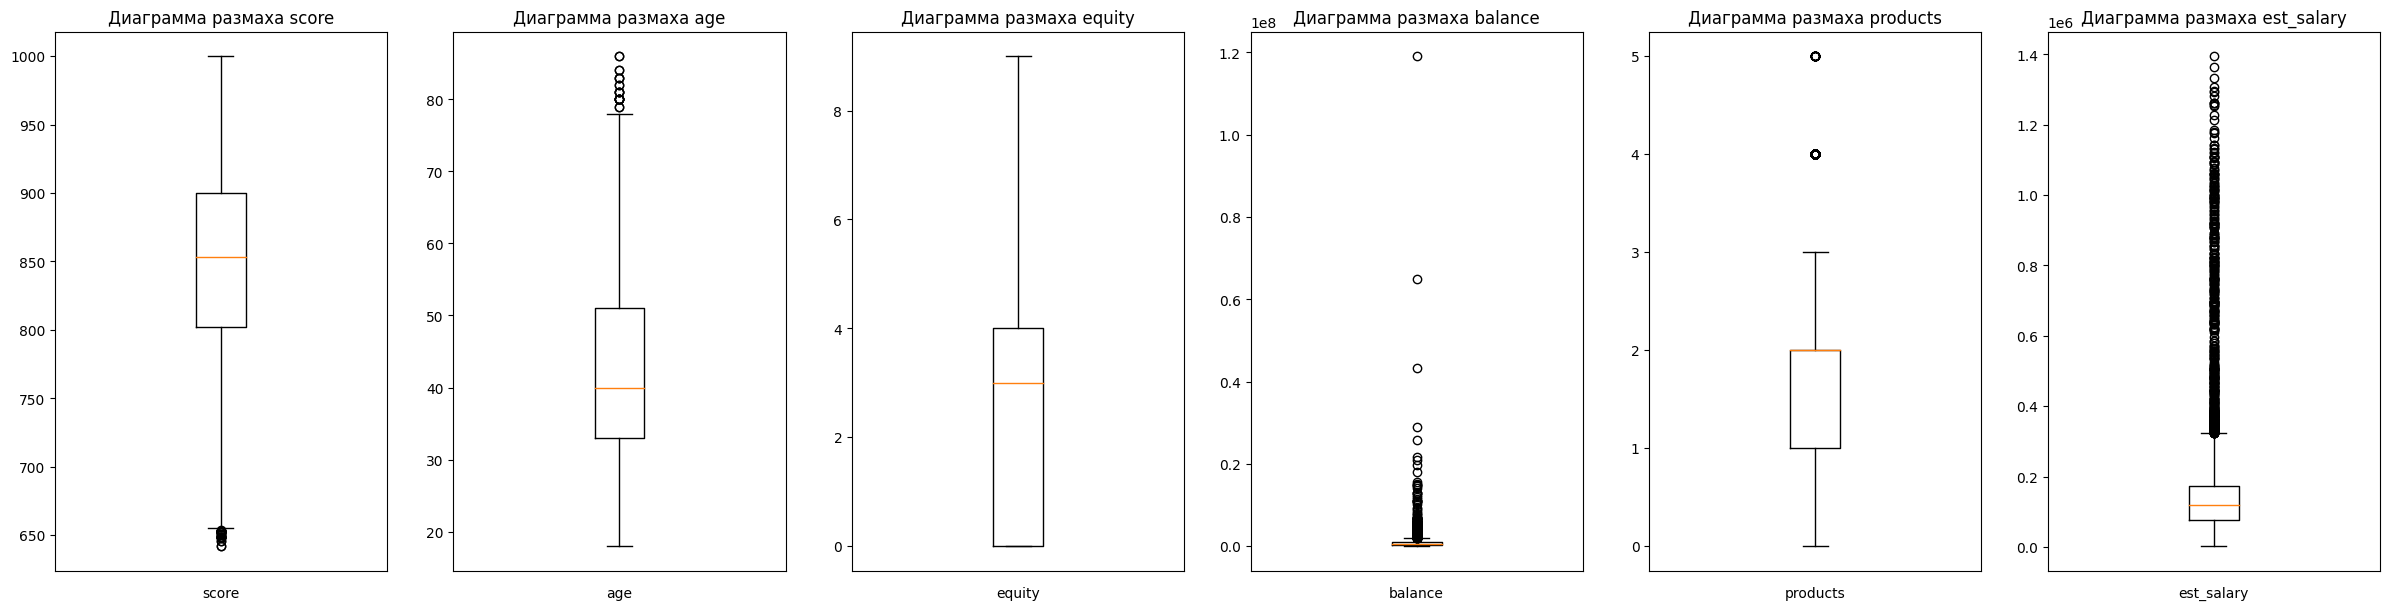

In [29]:
# построение диаграмм размаха 
fig, ax = plt.subplots(nrows=1, ncols=len(columns), figsize=(30,7))

for i in range(len(columns)):
    ax[i].boxplot(df[~df[columns[i]].isna()][columns[i]])
    ax[i].set(xticklabels=[])  
    ax[i].set(xlabel= columns[i])
    ax[i].tick_params(bottom=False) 
    ax[i].set(title = 'Диаграмма размаха ' + columns[i])
plt.show();

In [30]:
# поиск выбросов и оценка их количества
fliers = df.loc[0:0].drop(index=[0])

for col in columns:
    fliers = fliers.append(df[(df[col]>(np.quantile(df[~df[col].isna()][col], 0.75) + 1.5*(np.quantile(df[~df[col].isna()][col], 0.75) - np.quantile(df[~df[col].isna()][col], 0.25))))|
                 (df[col]<(np.quantile(df[~df[col].isna()][col], 0.25) - 1.5*(np.quantile(df[~df[col].isna()][col], 0.75) - np.quantile(df[~df[col].isna()][col], 0.25))))])
fliers = fliers.drop_duplicates()
print(f"Количество выбросов: {len(fliers)}, что составляет {len(fliers)/len(df)*100:.2f}%")

Количество выбросов: 1253, что составляет 12.56%


Количество выбросов составляет 12.56% от общего числа данных. Несмотря на большой процент выбросов, их необходимо удалить, поскольку дальшейнее исследование корреляции будет некорректным при их наличии.

In [31]:
# удаление выбросов
df_filtered = pd.concat([df, fliers]).drop_duplicates(keep=False)
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8721 entries, 0 to 9998
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        8721 non-null   int64  
 1   score          8721 non-null   int32  
 2   city           8721 non-null   object 
 3   gender         8721 non-null   object 
 4   age            8721 non-null   int32  
 5   equity         8721 non-null   int64  
 6   balance        6779 non-null   float64
 7   products       8721 non-null   int64  
 8   credit_card    8721 non-null   int64  
 9   last_activity  8721 non-null   int64  
 10  est_salary     8721 non-null   float64
 11  churn          8721 non-null   int64  
dtypes: float64(2), int32(2), int64(6), object(2)
memory usage: 817.6+ KB


###  Определение значимых признаков отточности

In [32]:
print(f"Количество бывших клиентов: {len(df_filtered[df_filtered['churn']==1])}")

Количество бывших клиентов: 1340


In [33]:
churn_level = round(len(df_filtered[df_filtered['churn']==1])/len(df_filtered)*100, 2)
print(f"Средний уровень оттока: {churn_level}%")

Средний уровень оттока: 15.37%


In [34]:
# таблица портрета клиента
portrait = pd.DataFrame(columns=['param', 'churn', 'non_churn', 'diff'])

In [35]:
def def_portrait(param, churn, non_churn, diff):
    '''
    функция для добавления строк в таблицу портрета клиента
    '''
    i = len(portrait)
    portrait.loc[i, 'param'] = param
    portrait.loc[i, 'churn'] = churn
    portrait.loc[i, 'non_churn'] = non_churn
    portrait.loc[i, 'diff'] = diff
                                                                                                        

Всего по отфильтрованным данным 1340 клиентов отказались от услуг банка. Рассмотрим всего характеристики и определим наиболее значимые признаки отточности

#### Анализ по столбцу score

In [36]:
#сводная таблица распределения значение кредитного скоринга по диапазонам бывших клиентов
bins = []
bins.append(round(df_filtered['score'].min()/30)*30)
for i in range(round(df_filtered['score'].min()/30)*30+30, round((df_filtered['score'].max()+30)/30)*30, 30):
    bins.append(i)
df_filtered['temp'] = pd.cut(df_filtered['score'], bins = bins, include_lowest=True)
pt = df_filtered[df_filtered['churn']==1].groupby('temp', as_index = False)['user_id'].count().rename(columns ={'temp':'score','user_id':'churn'})
pt['churn']=round(pt['churn']/pt['churn'].sum(),2)
pt.style.background_gradient(subset = ['churn'], axis=None).format({'churn':"{:.2f}"})

,score,churn
0,"(659.999, 690.0]",0.00
1,"(690.0, 720.0]",0.00
2,"(720.0, 750.0]",0.01
3,"(750.0, 780.0]",0.05
4,"(780.0, 810.0]",0.13
5,"(810.0, 840.0]",0.19
6,"(840.0, 870.0]",0.24
7,"(870.0, 900.0]",0.22
8,"(900.0, 930.0]",0.11
9,"(930.0, 960.0]",0.03


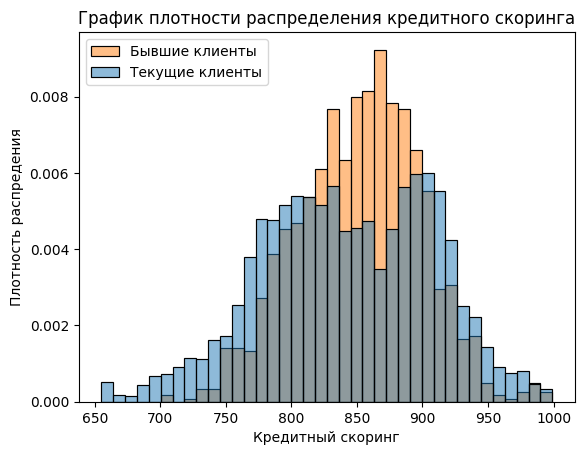

In [37]:
# график плотности распределения кредитного скоринга бывших и текущих клиентов
sns.histplot(data=df_filtered, x='score', hue='churn', stat='density', common_norm=False);

plt.title('График плотности распределения кредитного скоринга')
plt.xlabel('Кредитный скоринг')
plt.ylabel('Плотность распредения')
plt.legend(title = '', labels = ['Бывшие клиенты','Текущие клиенты']);

In [38]:
print(f"Среднее значение кредитного скоринга бывших клиентов: {df_filtered[df_filtered['churn']==1]['score'].mean():.0f}")
print(f"Среднее значение кредитного скоринга текущих клиентов: {df_filtered[df_filtered['churn']==0]['score'].mean():.0f}")
print(f"Относительная разница: {df_filtered[df_filtered['churn']==1]['score'].mean()/df_filtered[df_filtered['churn']==0]['score'].mean()-1:.2f}")

Среднее значение кредитного скоринга бывших клиентов: 852
Среднее значение кредитного скоринга текущих клиентов: 843
Относительная разница: 0.01


Несмотря на то, что средние значения близки и относительная разница составляет всего 1%. В диапазоне 830-900 наблюдается максимальная плотность распределения бывших клиентов.  

In [39]:
# добавление информации в портрет
def_portrait('Среднее score',
         round(df_filtered[df_filtered['churn']==1]['score'].mean(),2),
         round(df_filtered[df_filtered['churn']==0]['score'].mean(),2),
         round((df_filtered[df_filtered['churn']==1]['score'].mean()/df_filtered[df_filtered['churn']==0]['score'].mean()-1)*100,2))


#### Анализ по столбцу city  в разрезе оттока


In [40]:
#сводная таблица относительного уровня оттока по населенным пунктам
pt = df_filtered[df_filtered['churn']==1].groupby('city', as_index=False)['user_id'].count().rename(columns={'user_id':'ratio'})
pt['ratio'] = round(pt['ratio']/sum(pt['ratio'])*100,2)
pt

,city,ratio
0,Ростов,16.04
1,Рыбинск,24.85
2,Ярославль,59.10


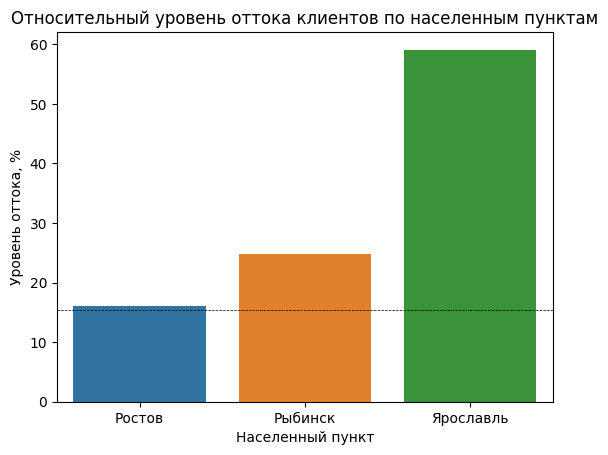

In [41]:
#столбчатая диграмма относительного уровня оттока по населенным пунктам
sns.barplot(data = pt, x = 'city', y = 'ratio')
plt.title('Относительный уровень оттока клиентов по населенным пунктам')
plt.xlabel('Населенный пункт')
plt.ylabel('Уровень оттока, %')
plt.axhline(y = churn_level, linestyle = '--', linewidth=0.5, color = 'Black')
plt.show();

In [42]:
print('Мода населенного пункта бывших клиентов:', statistics.mode(df_filtered[df_filtered['churn']==1]['city']))
print('Мода населенного пункта текущих клиентов:', statistics.mode(df_filtered[df_filtered['churn']==0]['city']))

Мода населенного пункта бывших клиентов: Ярославль
Мода населенного пункта текущих клиентов: Ярославль


Мода по населенным пунктам текущих и бывших клиентов - Ярославль. 59% бывших клиентов были привязаны к этому филиалу.  

In [43]:
# добавление информации в портрет
def_portrait('Мода city',
         statistics.mode(df_filtered[df_filtered['churn']==1]['city']),
         statistics.mode(df_filtered[df_filtered['churn']==0]['city']),
         '-')

#### Анализ по столбцу gender  в разрезе оттока


In [44]:
#сводная таблица относительного уровня оттока по полу
pt = df_filtered[df_filtered['churn']==1].groupby('gender', as_index=False)['user_id'].count().rename(columns={'user_id':'ratio'})
pt['ratio'] = round(pt['ratio']/sum(pt['ratio'])*100,2)
pt

,gender,ratio
0,Ж,36.49
1,М,63.51


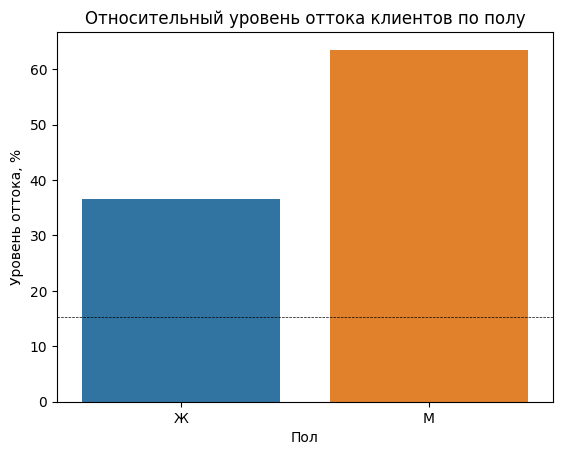

In [45]:
#столбчатая диграмма относительного уровня оттока по полу
sns.barplot(data = pt, x = 'gender', y = 'ratio')
plt.title('Относительный уровень оттока клиентов по полу')
plt.xlabel('Пол')
plt.ylabel('Уровень оттока, %')
plt.axhline(y = churn_level, linestyle = '--', linewidth=0.5, color = 'Black')
plt.show();

In [46]:
print('Мода пола бывших клиентов:', statistics.mode(df_filtered[df_filtered['churn']==1]['gender']))
print('Мода пола текущих клиентов:', statistics.mode(df_filtered[df_filtered['churn']==0]['gender']))

Мода пола бывших клиентов: М
Мода пола текущих клиентов: Ж


64% бывших клиентов - мужчины, 36 - женщины. Мода текущих и бывших клиентов различна: среди бывших клиентов преобладают мужчины, в отличие от текущих клиентов, где большинство женщин.

In [47]:
# добавление информации в портрет
def_portrait('Мода gender',
         statistics.mode(df_filtered[df_filtered['churn']==1]['gender']),
         statistics.mode(df_filtered[df_filtered['churn']==0]['gender']),
         '-')

#### Анализ по столбцу age

In [48]:
#сводная таблица распределения возраста бывших клиентов
bins = []
bins.append(df_filtered['age'].min())
for i in range(round(df_filtered['age'].min()/7)*7+7, round((df_filtered['age'].max()+7)/7)*7, 7):
    bins.append(i)
df_filtered['temp'] = pd.cut(df_filtered['age'], bins = bins, include_lowest=True)
pt = df_filtered[df_filtered['churn']==1].groupby('temp', as_index = False)['user_id'].count().rename(columns ={'temp':'age','user_id':'churn'})
pt['churn']=round(pt['churn']/pt['churn'].sum()*100,2)
pt.style.background_gradient(subset = ['churn'], axis=None).format({'churn':"{:.2f}"})

,age,churn
0,"(17.999, 28.0]",12.84
1,"(28.0, 35.0]",26.72
2,"(35.0, 42.0]",19.48
3,"(42.0, 49.0]",10.07
4,"(49.0, 56.0]",17.09
5,"(56.0, 63.0]",12.16
6,"(63.0, 70.0]",1.49
7,"(70.0, 77.0]",0.15


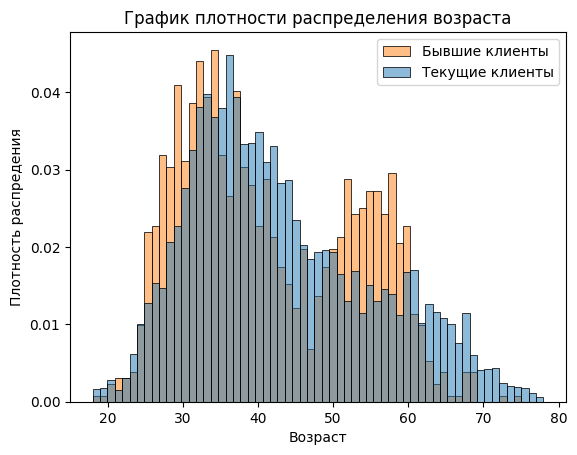

In [49]:
# график плотности распределения возраста бывших и текущих клиентов
sns.histplot(data=df_filtered, x='age', hue='churn', stat='density', bins = df_filtered['age'].max() - df_filtered['age'].min()+1, common_norm=False);
plt.title('График плотности распределения возраста')
plt.xlabel('Возраст')
plt.ylabel('Плотность распредения')
plt.legend(title = '', labels = ['Бывшие клиенты','Текущие клиенты']);

In [50]:
print(f"Среднее значение возраста бывших клиентов: {df_filtered[df_filtered['churn']==1]['age'].mean():.0f}")
print(f"Среднее значение возраста текущих клиентов: {df_filtered[df_filtered['churn']==0]['age'].mean():.0f}")
print(f"Относительная разница: {df_filtered[df_filtered['churn']==1]['age'].mean()/df_filtered[df_filtered['churn']==0]['age'].mean()-1:.2f}")

Среднее значение возраста бывших клиентов: 41
Среднее значение возраста текущих клиентов: 43
Относительная разница: -0.03


Средние значения близки и относительная разница составляет 3%. По графику видно распределения различаются. Плотность распределения возраста бывших клиентов значительно выше в диапазонах 25-35 и 50-61.

In [51]:
# добавление информации в портрет
def_portrait('Среднее age',
         round(df_filtered[df_filtered['churn']==1]['age'].mean(), 0),
         round(df_filtered[df_filtered['churn']==0]['age'].mean(), 0),
         round((df_filtered[df_filtered['churn']==1]['age'].mean()/df_filtered[df_filtered['churn']==0]['age'].mean()-1)*100,2))

#### Анализ по столбцу equity  в разрезе оттока

In [52]:
#сводная таблица относительного уровня оттока по баллам собственности
pt = df_filtered[df_filtered['churn']==1].groupby('equity', as_index=False)['user_id'].count().rename(columns={'user_id':'ratio'})
pt['ratio'] = round(pt['ratio']/sum(pt['ratio'])*100,2)
pt.style.background_gradient(subset = ['ratio'], axis=None).format({'churn':"{:.2f}"})

,equity,ratio
0,0,5.820000
1,1,6.340000
2,2,10.220000
3,3,18.960000
4,4,24.180000
5,5,29.550000
6,6,2.460000
7,7,1.790000
8,8,0.220000
9,9,0.450000


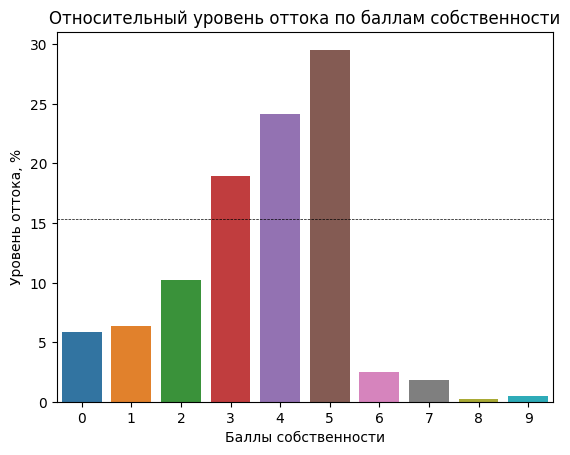

In [53]:
#столбчатая диграмма относительного уровня оттока по баллам собственности
sns.barplot(data = pt, x = 'equity', y = 'ratio')
plt.title('Относительный уровень оттока по баллам собственности')
plt.xlabel('Баллы собственности')
plt.ylabel('Уровень оттока, %')
plt.axhline(y = churn_level, linestyle = '--', linewidth=0.5, color = 'Black')
plt.show();

In [54]:
print(f"Медиана количества баллов собственности бывших клиентов: {df_filtered[df_filtered['churn']==1]['equity'].median():.0f}")
print(f"Медиана количества баллов собственности текущих клиентов: {df_filtered[df_filtered['churn']==0]['equity'].median():.0f}")

Медиана количества баллов собственности бывших клиентов: 4
Медиана количества баллов собственности текущих клиентов: 3


Медианные значения близки. Уровень оттока бывших клиентов выше среднего только при значениях от 3 до 5 баллов собственности. 

In [55]:
# добавление информации в портрет
def_portrait('Медиана equity',
         round(df_filtered[df_filtered['churn']==1]['equity'].median(), 0),
         round(df_filtered[df_filtered['churn']==0]['equity'].median(), 0),
         '-')

#### Анализ по столбцу balance

In [56]:
#сводная таблица распределения баланса по диапазонам бывших клиентов
bins = []
bins.append(0)
for i in range(100000, round((df_filtered[~df_filtered['balance'].isna()]['balance'].max()+100000)/100000)*100000, 100000):
    bins.append(i)
df_filtered['temp'] = pd.cut(df_filtered[~df_filtered['balance'].isna()]['balance'], bins = bins, include_lowest=True)
pt = df_filtered[df_filtered['churn']==1].groupby('temp', as_index = False)['user_id'].count().rename(columns ={'temp':'balance','user_id':'churn'})
pt['churn']=round(pt['churn']/pt['churn'].sum()*100,2)
pt.style.background_gradient(subset = ['churn'], axis=None).format({'churn':"{:.2f}"})

,balance,churn
0,"(-0.001, 100000.0]",4.05
1,"(100000.0, 200000.0]",7.66
2,"(200000.0, 300000.0]",9.76
3,"(300000.0, 400000.0]",10.36
4,"(400000.0, 500000.0]",9.61
5,"(500000.0, 600000.0]",7.28
6,"(600000.0, 700000.0]",5.93
7,"(700000.0, 800000.0]",6.38
8,"(800000.0, 900000.0]",5.71
9,"(900000.0, 1000000.0]",5.48


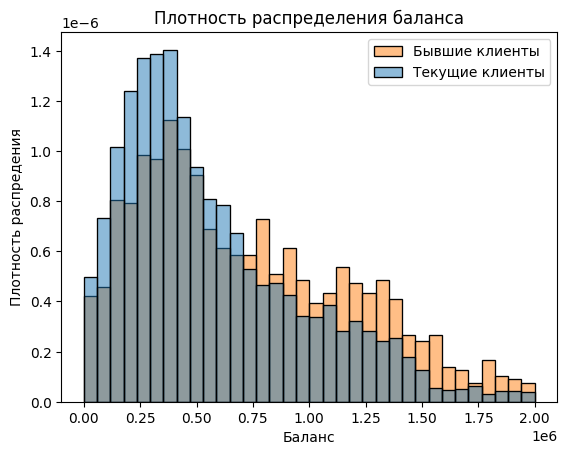

In [57]:
# график плотности распределения баланса бывших и текущих клиентов
sns.histplot(data=df_filtered[~df_filtered['balance'].isna()], x='balance', hue='churn', stat='density', common_norm=False);
plt.title('Плотность распределения баланса')
plt.xlabel('Баланс')
plt.ylabel('Плотность распредения')
plt.legend(title = '', labels = ['Бывшие клиенты','Текущие клиенты']);

In [58]:
print(f"Среднее значение баланса бывших клиентов: {df_filtered[(~df_filtered['balance'].isna())&(df_filtered['churn']==1)]['balance'].mean():.2f}")
print(f"Среднее значение баланса текущих клиентов: {df_filtered[(~df_filtered['balance'].isna())&(df_filtered['churn']==0)]['balance'].mean():.2f}")
print(f"Относительная разница: {df_filtered[(~df_filtered['balance'].isna())&(df_filtered['churn']==1)]['balance'].mean()/df_filtered[(~df_filtered['balance'].isna())&(df_filtered['churn']==0)]['balance'].mean()-1:.2f}")

Среднее значение баланса бывших клиентов: 719455.87
Среднее значение баланса текущих клиентов: 568483.55
Относительная разница: 0.27


Баланс бывших клиентов значительно выше баланса текущих клиентов - на 27 процентов. Пиковые значения плотностей бывших и текущих клиентов совпадают. Однако после 750000 плотность распределения бывших клиентов выше плотности распределения текущих клиентов.

In [59]:
# добавление информации в портрет
def_portrait('Среднее balance',
         round(df_filtered[(~df_filtered['balance'].isna())&(df_filtered['churn']==1)]['balance'].mean(), 2),
         round(df_filtered[(~df_filtered['balance'].isna())&(df_filtered['churn']==0)]['balance'].mean(), 2),
         round((df_filtered[(~df_filtered['balance'].isna())&(df_filtered['churn']==1)]['balance'].mean()/df_filtered[(~df_filtered['balance'].isna())&(df_filtered['churn']==0)]['balance'].mean()-1)*100,2))

#### Анализ по столбцу products  в разрезе оттока

In [60]:
#сводная таблица относительного уровня оттока по количеству продуктов
pt = df_filtered[df_filtered['churn']==1].groupby('products', as_index=False)['user_id'].count().rename(columns={'user_id':'ratio'})
pt['ratio'] = round(pt['ratio']/sum(pt['ratio'])*100,2)
pt

,products,ratio
0,1,16.49
1,2,64.55
2,3,18.96


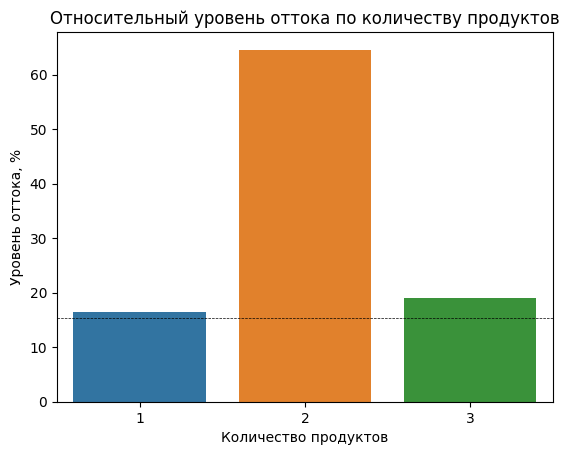

In [61]:
#столбчатая диграмма относительного уровня оттока по количеству продуктов

sns.barplot(data = pt, x = 'products', y = 'ratio')

plt.title('Относительный уровень оттока по количеству продуктов')
plt.xlabel('Количество продуктов')
plt.ylabel('Уровень оттока, %')
plt.axhline(y = churn_level, linestyle = '--', linewidth=0.5, color = 'Black')
plt.show();

In [62]:
print('Медиана количества банковских продуктов бывших клиентов:', df_filtered[df_filtered['churn']==1]['products'].median())
print('Медиана количества банковских продуктов текущих клиентов:', df_filtered[df_filtered['churn']==1]['products'].median())

Медиана количества банковских продуктов бывших клиентов: 2.0
Медиана количества банковских продуктов текущих клиентов: 2.0


Медиана количества банковских продуктов для бывших и текущих клиентов равна. 65% бывших клиентов имели 2 продукта и примерно равный процент 1 и 3 продуктов, близкий к среднему уровню оттока по банку.    

In [63]:
# добавление информации в портрет
def_portrait('Медиана products',
         round(df_filtered[df_filtered['churn']==1]['products'].median(), 0),
         round(df_filtered[df_filtered['churn']==0]['products'].median(), 0),
         '-')

#### Анализ по столбцу credit_card  в разрезе оттока


In [64]:
#сводная таблица относительного уровня оттока по наличию кредитной карты
pt = df_filtered[df_filtered['churn']==1].groupby('credit_card', as_index=False)['user_id'].count().rename(columns={'user_id':'ratio'})
pt['ratio'] = round(pt['ratio']/sum(pt['ratio'])*100,2)
pt

,credit_card,ratio
0,0,46.64
1,1,53.36


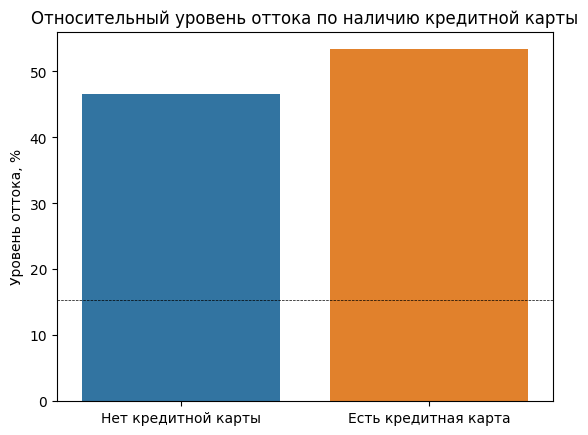

In [65]:
#столбчатая диграмма относительного уровня оттока по наличию кредитной карты

sns.barplot(data = pt, x = 'credit_card', y = 'ratio')

plt.title('Относительный уровень оттока по наличию кредитной карты')
plt.xlabel('')
plt.ylabel('Уровень оттока, %')
plt.axhline(y = churn_level, linestyle = '--', linewidth=0.5, color = 'Black')
plt.xticks([0,1], ['Нет кредитной карты','Есть кредитная карта'])
plt.show();

In [66]:
print('Медиана наличия кредитной карты у бывших клиентов:', df_filtered[df_filtered['churn']==1]['credit_card'].median())
print('Медиана наличия кредитной карты у текущих клиентов:', df_filtered[df_filtered['churn']==1]['credit_card'].median())

Медиана наличия кредитной карты у бывших клиентов: 1.0
Медиана наличия кредитной карты у текущих клиентов: 1.0


Медиана наличия кредитной карты и у бывших, и у текущих клиентов равно. Бывшие примерно пополам поделились по признаку наличия кредитной карты, с небольшим перевесом в пользу наличия.

In [67]:
# добавление информации в портрет
def_portrait('Медиана credit_card',
         round(df_filtered[df_filtered['churn']==1]['credit_card'].median(), 0),
         round(df_filtered[df_filtered['churn']==0]['credit_card'].median(), 0),
         '-')

#### Анализ по столбцу last_activity  в разрезе оттока


In [68]:
#сводная таблица относительного уровня оттока по активности
pt = df_filtered[df_filtered['churn']==1].groupby('last_activity', as_index=False)['user_id'].count().rename(columns={'user_id':'ratio'})
pt['ratio'] = round(pt['ratio']/sum(pt['ratio'])*100,2)
pt

,last_activity,ratio
0,0,30.15
1,1,69.85


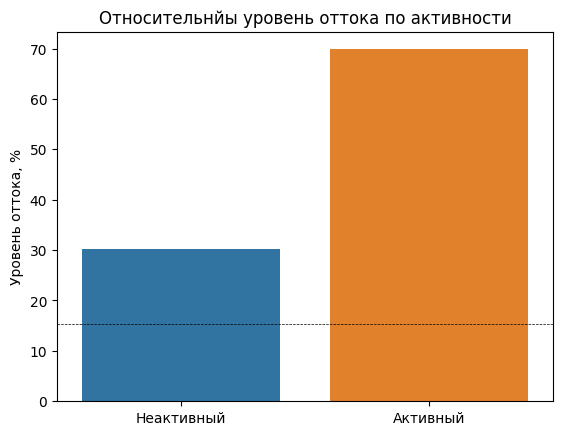

In [69]:
#столбчатая диграмма относительного уровня оттока по активности

sns.barplot(data = pt, x = 'last_activity', y = 'ratio')

plt.title('Относительнйы уровень оттока по активности')
plt.xlabel('')
plt.ylabel('Уровень оттока, %')
plt.axhline(y = churn_level, linestyle = '--', linewidth=0.5, color = 'Black')
plt.xticks([0,1], ['Неактивный','Активный'])
plt.show();

In [70]:
print('Медиана активности бывших клиентов:', df_filtered[df_filtered['churn']==1]['last_activity'].median())
print('Медиана активности текущих клиентов:', df_filtered[df_filtered['churn']==1]['last_activity'].median())

Медиана активности бывших клиентов: 1.0
Медиана активности текущих клиентов: 1.0


Медина активности бывших и текущих клиентов равна. Большинство бывших пользователей являлись активными. Однако точно неизвестна "природа" активности. Возможно это всего лишь снятие средств и закрытие счетом перед уходом из банка.

In [71]:
# добавление информации в портрет
def_portrait('Медиана last_activity',
         round(df_filtered[df_filtered['churn']==1]['last_activity'].median(), 0),
         round(df_filtered[df_filtered['churn']==0]['last_activity'].median(), 0),
         '-')

#### Анализ по столбцу est_salary

In [72]:
#сводная таблица распределения заработной платы по диапазонам бывших клиентов
bins = []
bins.append(0)
for i in range(10000, round((df_filtered['est_salary'].max()+25000)/25000)*25000, 25000):
    bins.append(i)
df_filtered['temp'] = pd.cut(df_filtered['est_salary'], bins = bins, include_lowest=True)
pt = df_filtered[df_filtered['churn']==1].groupby('temp', as_index = False)['user_id'].count().rename(columns ={'temp':'est_salary','user_id':'churn'})
pt['churn']=round(pt['churn']/pt['churn'].sum()*100,2)
pt.style.background_gradient(subset = ['churn'], axis=None).format({'churn':"{:.2f}"})

,est_salary,churn
0,"(-0.001, 10000.0]",0.00
1,"(10000.0, 35000.0]",5.07
2,"(35000.0, 60000.0]",11.57
3,"(60000.0, 85000.0]",14.48
4,"(85000.0, 110000.0]",16.34
5,"(110000.0, 135000.0]",17.09
6,"(135000.0, 160000.0]",12.16
7,"(160000.0, 185000.0]",10.60
8,"(185000.0, 210000.0]",5.30
9,"(210000.0, 235000.0]",3.51


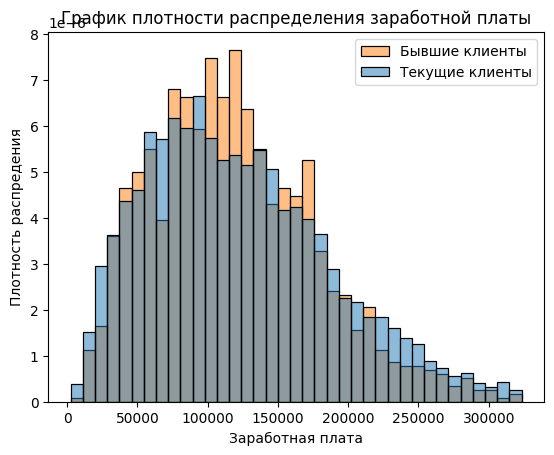

In [73]:
# график плотности распределения заработной платы бывших и текущих клиентов
sns.histplot(data=df_filtered, x='est_salary', hue='churn', stat='density', common_norm=False);
plt.title('График плотности распределения заработной платы')
plt.xlabel('Заработная плата')
plt.ylabel('Плотность распредения')
plt.legend(title = '', labels = ['Бывшие клиенты','Текущие клиенты']);

In [74]:
print(f"Среднее значение заработной платы бывших клиентов: {df_filtered[df_filtered['churn']==1]['est_salary'].mean():.2f}")
print(f"Среднее значение заработной платы текущих клиентов: {df_filtered[df_filtered['churn']==0]['est_salary'].mean():.2f}")
print(f"Относительная разница: {df_filtered[df_filtered['churn']==1]['est_salary'].mean()/df_filtered[df_filtered['churn']==0]['est_salary'].mean()-1:.2f}")

Среднее значение заработной платы бывших клиентов: 119004.14
Среднее значение заработной платы текущих клиентов: 121789.15
Относительная разница: -0.02


Средняя зарплата текущих клиентов незначительно выше средней зарплаты бывших клиентов. На диаграмме плотностей видно, что распределения похожи, однако плотность распределения бывших клиентов выше в диапазоне с 70000 до 130000 с небольшим всплеском 150000-170000.

In [75]:
# добавление информации в портрет
def_portrait('Среднее est_salary',
         round(df_filtered[df_filtered['churn']==1]['est_salary'].mean(), 2),
         round(df_filtered[df_filtered['churn']==0]['est_salary'].mean(), 2),
         round((df_filtered[df_filtered['churn']==1]['est_salary'].mean()/df_filtered[df_filtered['churn']==0]['est_salary'].mean()-1)*100,2))

### Портрет клиента

In [76]:
portrait.sort_values('param', ascending = False)

,param,churn,non_churn,diff
0,Среднее score,852.44,842.89,1.13
9,Среднее est_salary,119004.14,121789.15,-2.29
5,Среднее balance,719455.87,568483.55,26.56
3,Среднее age,41.0,43.0,-3.48
2,Мода gender,М,Ж,-
1,Мода city,Ярославль,Ярославль,-
6,Медиана products,2.0,2.0,-
8,Медиана last_activity,1.0,0.0,-
4,Медиана equity,4.0,3.0,-
7,Медиана credit_card,1.0,1.0,-


Из сводной таблицы портрета видно, что:
- сильно отличаются параметры:
    - balance
    - gender
- отличаются незначительно:
    - score
    - est_salary
    - age
    - last_activity
    - equity
- не отличают:
    - credit_card
    - last_activity.
    
На этапе исследования  выделим balance и gender, как значимые признаки отточности.
Остальные признаки (за исключением last_activity) необходимо проверить статистически и рассмотреть корреляцию этих признаков с признаком churn.

## Исследование корреляции

Необходимо рассмотреть корреляцию признаков с оттоком. Поскольку отток (churn) дискретная величина, то зависимость будет нелинейной. Поэтому коэффициент корреляции Пирсона некорректен. Для расчет взаимосвязи будем использовать метод, который базируется на подсчете хи-квадрат статистики. Этот метод работает со всеми данными: интервальными, категориальными и порядковыми. Поэтому нет необходимости дополнительного кодирования категориальных данных.

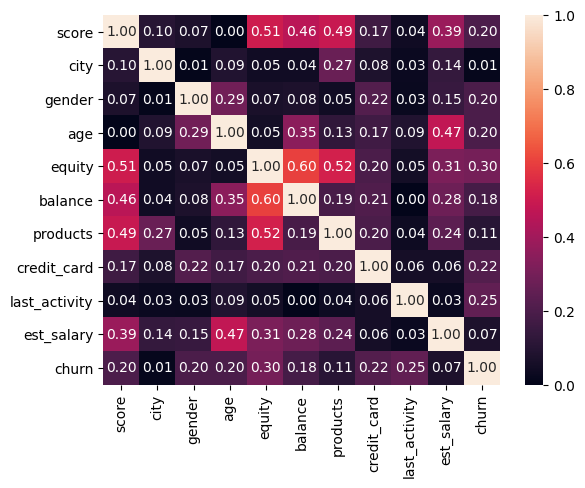

In [77]:
phik_overview = df_filtered[['score','city','gender','age','equity','balance','products','credit_card','last_activity','est_salary','churn']].phik_matrix(interval_cols=['est_salary', 'age', 'balance'])
sns.heatmap(phik_overview, annot=True, fmt=".2f");

In [78]:
pt = pd.DataFrame({'Параметр':phik_overview['churn'].index, 'Корреляция':phik_overview['churn'].values})
pt = pt[pt['Параметр']!='churn']
pt= pt.sort_values(by = 'Корреляция', ascending=False)
pt.style.background_gradient(subset = ['Корреляция'], axis=None).format({'Корреляция':"{:.2f}"})

,Параметр,Корреляция
4,equity,0.30
8,last_activity,0.25
7,credit_card,0.22
0,score,0.20
2,gender,0.20
3,age,0.20
5,balance,0.18
6,products,0.11
9,est_salary,0.07
1,city,0.01


<b>Вывод:</b>

Если оценивать результаты исследования корреляции признаков по шкале Чеддока, все взаимосвязи с признаком оттока - слабые, только количество баллов собственности находится на границе с "умеренной".

## Проверка гипотез

Для дополнительной оценки значимых признаков проведем проверку гипотез по признакам, которые не были выделены ранее:
- score
- age
- products
- credit_card
- est_salary

Для проверки гипотез о равенстве средних score, age, products, est_salary будем использовать t-теста, т.к.:

- выборки независимые;
- выборки большие (>30), по ЦПТ выборочные средние распределены нормально;
- дисперсии неизвестны, необхомид использовать параметр equal_var при проведении теста.

In [79]:
alpha = 1-(1-0.05)**(1/5)

In [80]:
def H_testing_ttest(col):
    '''
    Функция проверки гипотез
    '''
    results = stats.ttest_ind(df_filtered[df_filtered['churn']==1][col], df_filtered[df_filtered['churn']!=1][col], equal_var=False)
    print('p-значение: ', results.pvalue)
    if results.pvalue < alpha:
        print('Отвергаем нулевую гипотезу: разница статистически значима')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

### Проверка гипотезы о равенстве среднего скоринга текущих и бывших клиентов

H0: Средний банковский скоринг бывших клиентов равен среднему банковскому скорингу текущих клиентов

Н1: Средний банковский скоринг бывших клиентов не равен среднему банковскому скорингу текущих клиентов

In [81]:
H_testing_ttest('score')

p-значение:  1.730984696174094e-10
Отвергаем нулевую гипотезу: разница статистически значима


По полученным результатам проверки гипотезы H0 была отвергута, средние банковские скоринги бывших и текущих клиентов не равно.

### Проверка гипотезы о равенстве средних заработных плат текущих и бывших клиентов

H0: Средняя заработная плата бывших клиентов равна средней заработной плате текущих клиентов

Н1: Средняя заработная плата бывших клиентов не равна средней заработной плате текущих клиентов

In [82]:
H_testing_ttest('est_salary')

p-значение:  0.11312416496176218
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


По полученным результатам проверки гипотезы H0 не удалось отвергнуть. Нет достаточных доказательств в поддержку утверждения о том, что средних заработных плат текущих и бывших клиентов не равны.

### Проверка гипотезы о равенстве среднего возраста текущих и бывших клиентов;

H0: Средний возраст бывших клиентов равен среднему возрасту текущих клиентов

Н1: Средний возраст бывших клиентов не равен среднему возрасту текущих клиентов

In [83]:
H_testing_ttest('age')

p-значение:  1.8541875185316773e-05
Отвергаем нулевую гипотезу: разница статистически значима


По полученным результатам проверки гипотезы H0 была отвергута, средний возраст бывших клиентов не равен среднему возрасту  текущих клиентов.

### Проверка гипотезы о равенстве среднего количества используемых банковских продуктов текущих и бывших клиентов

H0: Среднее количество банковских продуктов бывших клиентов равно среднему количеству банковских продуктов текущих клиентов

Н1: Среднее количество банковских продуктов бывших клиентов не равно среднему количеству банковских продуктов текущих клиентов

In [84]:
H_testing_ttest('products')

p-значение:  6.108638592767594e-62
Отвергаем нулевую гипотезу: разница статистически значима


По полученным результатам проверки гипотезы H0 была отвергута, среднее количество банковских продуктов бывших и текущих клиентов различно.

### Проверка гипотезы о равенстве долей держателей кредитных карт текущих и бывших клиентов.

Для проверки гипотезы о равенстве долей используем z-test

Н0: доли держателей кредитных карт бывших и текущих клиентов равны

Н1: доли держателей кредитных карт бывших и текущих клиентов не равны


In [85]:
#количество держателей кредитных карт бывших и текущих клиентов
count = np.array([len(df_filtered[(df_filtered['churn']==1)&(df_filtered['credit_card']==1)]), 
                  len(df_filtered[(df_filtered['churn']!=1)&(df_filtered['credit_card']==1)])])
#количество бывших и текущих клиентов
nobs = np.array([len(df_filtered[(df_filtered['churn']==1)]), len(df_filtered[df_filtered['churn']!=1])])

results = proportions_ztest(count, nobs)

print('p-значение: ', results[1])

if results[1] < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными') 


p-значение:  1.3247241975320083e-38
Отвергаем нулевую гипотезу: между долями есть значимая разница


По полученным результатам проверки гипотезы H0 была отвергута, между долями держателей кредитных карт текущих и бывших клиентов есть значимая разница.

<b>Вывод:</b>

Проверка гипотез показала, что к значимым признакам оттока можно отнести:
- банковский скоринг;
- возраст;
- количество банковских продуктов;
- наличие кредитных карт.

## Промежуточные итоги

Для сегментации клиентов выделим следующие значимые характеристики и диапозоны значений:

0. Банковский скоринг (score) - от 830 до 900.
1. Пол (gender) - мужской.
2. Возраст (age) - 25-35 и 50-61.
3. Баллы собственности (equity) - 3-5.
4. Баланс (balance) - больше 750000.
5. Количество банковских продуктов (products) - больше 1.
6. Наличие кредитной карты (credit_card) - нет кредитной карты.

## Сегментация клиентов 

По тех. заданию должно быть выделено минимум 3 сегмента, каждый сегмент должен быть большее 500 человек и уровень оттока в сегменте выше, чем уровень оттока по банку. 

In [86]:
# уровень оттока по банку
print(f'Уровень оттока по банку: {churn_level}%')

Уровень оттока по банку: 15.37%


In [87]:
# условия для сегментации
c0 = df_filtered[(df_filtered['score']>=830)&(df_filtered['score']<=900)]
c1 = df_filtered[df_filtered['gender']=='М']
c2 = df_filtered[(df_filtered['age']>=25)&(df_filtered['age']<=35)|(df_filtered['age']>=50)&(df_filtered['age']<=61)]
c3 = df_filtered[(df_filtered['equity']>=3)&(df_filtered['equity']<=5)]
c4 = df_filtered[df_filtered['balance']>750000]
c5 = df_filtered[df_filtered['products']>1]
c6 = df_filtered[df_filtered['credit_card']==0]
list_c = [c0,c1,c2,c3,c4,c5,c6]
list_c_2 = [0,1,2,3,4,5, 6]

Поиск и приоритезируем комбинации признаков для деления на 3 сегмента по уровню оттока.


Рассмотрим комбинации 2 и 3 признаков, т.к.:
- с 1 признаком сложно подобрать рекоминдации
- более 3 есть риск, что выделенный сегмент клиентов невосприимчивым к удержанию

In [88]:
#комбинации с 2 условиями
max_list_2 = []
for i in range(len(list_c)-1):
    for j in range(i+1, len(list_c)):
        seg = pd.merge(list_c[i], list_c[j], how='inner')
        if len(seg)>500:
            max_list_2.append([[i, j], round(len(seg[seg['churn']==1])/len(seg)*100,2), len(seg)])
len(max_list_2)            

21

In [89]:
#комбинации с 3 условиями
max_list_3 = []
for i in range(len(list_c)-2):
    for j in range(i+1, len(list_c)-1):
        for k in range(j+1, len(list_c)):
            seg = pd.merge(list_c[i], list_c[j], how='inner')
            seg = pd.merge(seg, list_c[k], how='inner')
            if len(seg)>500:
                max_list_3.append([[i, j, k], round(100*len(seg[seg['churn']==1])/len(seg),2), len(seg)])
len(max_list_3) 

28

In [90]:
# итоговый список комбинаций
max_list = max_list_2 + max_list_3

In [91]:
#все комбинации из списка комбинаций для 3 сегментов
comb_list = list(combinations(max_list, 3))

In [92]:
#проверка условия неповторения признаков, выбор лучшего сочетания комбинаций
final_list = [] #список комбинаций, где не повторяются признаки
for item in comb_list:
    c_list = [] # список признаков
    com_list = [] #список комбинаций признаков сегментов
    c_sum = 0 # уровень оттока
    for j in range(0, 3):
        c_list = c_list + item[j][0]
        com_list.append(item[j][0])
        c_sum += item[j][1] 
    if len(set(c_list))==7:    
        final_list.append([com_list, c_sum])
final_list = sorted(final_list, key=lambda row: row[1], reverse = True) 
best_c = final_list[0]
best_c

[[[0, 2, 6], [1, 3, 6], [2, 4, 5]], 124.75]

In [93]:
#проверка условия неповторения признаков, выбор лучшего сочетания комбинаций
final_list = [] #список комбинаций, где не повторяются признаки
for item in comb_list:
    c_list = [] # список признаков
    com_list = [] #список комбинаций признаков сегментов
    c_sum = 0 # уровень оттока
    for j in range(0, 3):
        c_list = c_list + item[j][0]
        com_list.append(item[j][0])
        c_sum += item[j][1] 
 
    if len(set(c_list))==7:
        dup_list=[]
        flag_all=0
        for m in range(0, 2):
            for n in range(m+1, 3):
                dup_item=[]
                flag=0
                dup_item = list(set(com_list[m]) & set(com_list[n]))   
                if (len(dup_item)>1):
                    flag = 1
                flag_all=flag_all+flag
                dup_list=dup_list+dup_item
        if (len(set(dup_list))==len(dup_list)) and (flag_all==0):        
            final_list.append([com_list, c_sum])                 
final_list = sorted(final_list, key=lambda row: row[1], reverse = True) 
best_c = final_list[0]
best_c

[[[0, 2, 6], [1, 3, 6], [2, 4, 5]], 124.75]

In [94]:
# вывод информации о сегментах: номера признаков, объем сегмента, уровень оттока
temp = df_filtered.loc[0:0].drop(index=[0])
seg = df_filtered.loc[0:0].drop(index=[0])
for i in range(3):
    temp = df_filtered.loc[0:0].drop(index=[0])
    print(f"Сегмент с признаками {best_c[0][i]}")
    count = 0
    for j in range(len(best_c[0][i])):
        if count>0:
            temp = temp.append(list_c[best_c[0][i][j]]) # объединение таблиц
            seg = temp[temp.duplicated()] # поиск дубликатов = пересечение 2 таблиц
        else:
            seg = temp.append(list_c[best_c[0][i][j]])
        temp = seg
        count+=1
    print('Объем сегмента:', len(seg))
    print('Уровень оттока:', round(100*len(seg[seg['churn']==1])/len(seg),2))
    print()

Сегмент с признаками [0, 2, 6]
Объем сегмента: 612
Уровень оттока: 41.99

Сегмент с признаками [1, 3, 6]
Объем сегмента: 625
Уровень оттока: 42.4

Сегмент с признаками [2, 4, 5]
Объем сегмента: 830
Уровень оттока: 40.36



Определились 3 сегмента с наилучшим сочетанием уровней оттока. Приоритезизуем сегменты по уровню оттока:

Сегмент 1

    - Признаки 1, 3, 6 - пол, баллы собственности, наличие кредитной карты
    - Объем сегмента: 625
    - Уровень оттока: 42.4

Сегмент 2

    - Признаки 0, 2, 6 - банковский скоринг, возраст, количество банковских продуктов 
    - Объем сегмента: 612
    - Уровень оттока: 41.99

Сегмент 3

    - Признаки 2, 4, 5 - возраст, баланс, наличие кредитной карты
    - Объем сегмента: 830
    - Уровень оттока: 40.36


## Вывод и выдача рекомендаций

По предоставленным данных о клиента банка «Метанпромбанк» был проведен анализ оттока. 

На этапе <b><i> исследования данных </i></b> был составлен портрет клиентов, которые ушли из банка и выделены в качестве значимых признаков оттока:
- <b>пол</b> (gender) клиента, а конкретнее отток мужчин выше, чем женщин;
- <b>баланс</b> (balance) клиента, а конкретнее средний баланс бывших клиентов на 27% выше среднего баланса текущих клиентов.

Оценка <b><i>корреляция</i></b> показала слабую тесноту связи по всем признакам, за исключение <b>количества баллов собственности</b> (equity) находится, где теснота связи на границе с умеренной.

Проверка <b><i>гипотез</i></b> опровергла нулевые гипотезы о равенстве:
- <b>банковского скоринга</b> бывших и текущих клиентов;
- <b>возраста</b> бывших и текущих клиентов;
- <b>количества банковских продуктов</b> бывших и текущих клиентов;
- долей <b>держателей кредитных карт</b> текущих и бывших клиентов.

Таким образом для сегментации выбраны следующие параметры и диапазоны:
- банковский скоринг (score) - от 830 до 900.
- пол (gender) - мужской.
- возраст (age) - 25-35 и 50-61.
- баллы собственности (equity) - 3-5.
- баланс (balance) - больше 750000.
- количество банковских продуктов (products) - больше 1.
- наличие кредитной карты (credit_card) - нет кредитной карты.

Выделены следующие сегменты:

- по признакам: пол, баллы собственности, наличие кредитной карт (отток 42.4%, количество клиентов 625).
- по признакам: возраст, баланс (отток 38.14%, количество клиентов 957).
- по признакам: банковский скоринг, количество банковских продуктов (отток 26.64%, количество клиентов 2324).


<b><i>Общие рекомендации:</i></b>

- создать систему автоматизированных рассылок для информирования клиентов о продуктах банка;
- проведение опроса у бывших клиентов о причинах ухода;
- проведение опроса у текущих клиентов о возможных улучшениях;

<b><i>Рекомендации по сегментам:</i></b>

1. Мужчина с баллами собственности 3-5 без кредитной карт:
    - предложить кредит с пониженной процентной ставкой под залог собственности;
    - пересмотреть список видов собственности для залога (возможно добавить автомобили, дачи, участки);
    - расширение партнерской программы со строительными и мебельными магазинами, магазинами автомобильных запчастей, заправок и др. для увеличения процента кэшбека по кредитной карте.
    - программа бесплатного страхования собственности к кредитной карте при использовании определенного лимита в месяц. 


2. Клиент в возрасте  25-35 лет и 50-61 с банковский скоринг 830-900, имеющий более 1 банковского продукта:
    - возможность изменения шкалы скоринга по возрасту для улучшения условий уже существующих продуктов (снижение процентов по кредитам, увеличение срока беспроцентного использования кредитной картой, рефинансирование кредитов; изменение стоимости обслуживания по счетам и картам);
    - ввести программу премиального обслуживания или расширить до скоринга 830 при наличии нескольких продуктов (например, персональный менеджер, приоритизация заявок и обращений, расширение программы бонусов и кэшбеков).
    

3. Клиент в возрасте  25-35 лет и 50-61 лет с балансом более 750000 и без кредитной карты:
    - предложить инвестиционный продукт, если существует, или разработать его (обязательное условие – доступность информации о рисках, возможностях и гарантиях);
    - предложить более выгодные условия по вкладу или накопительному счету: больше процент, возможность снятия/пополнения, увеличенный лимиты снятия/пополнения, гибкая корректировка срока вкладов и выплата процентов, улучшенные условия досрочного закрытия.
    - расширение линейки целевых кредитов с первоначальным взносом с пониженной ставкой (земельные участки, медицинское обслуживание, гараж/паркинг);
    - предложить кредитную карту с улучшенными условия (бонусная программа и увеличенный лимит)

<b>Материалы:</b>

<a href="https://disk.yandex.ru/i/KShR438SjorHBA">Презентация</a>

<a href="https://public.tableau.com/views/Banks_churn/ds_banks?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link">Дашборд</a>

